In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Зчитуємо csv файл
df = pd.read_csv('bestsellers.csv')

# Виводимо перші 5 рядків для перевірки
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [5]:
print(df.shape)

(550, 7)


In [ ]:
# Відповідь: Про скільки книг зберігає дані датасет? - 550

In [6]:
# Змінюємо регістр на малий та замінюємо пробіли на нижнє підкреслення
new_columns = [column.lower().replace(' ', '_') for column in df.columns]

# Присвоюємо нові імена стовпців
df.columns = new_columns

# Виводимо перші 5 рядків з оновленими назвами стовпців
print(df.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [7]:
# Обчислюємо кількість пропусків у кожному стовпці
missing_values = df.isna().sum()

# Виводимо кількість пропусків у кожному стовпці
print(missing_values)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
# Відповідь: Чи є в якихось змінних пропуски? - ні

In [8]:
# Отримуємо унікальні значення в стовпці "genre"
unique_genres = df['genre'].unique()

# Виводимо унікальні значення
print(unique_genres)

['Non Fiction' 'Fiction']


In [ ]:
# Відповідь: Які є унікальні жанри?  - Non Fiction, Fiction 

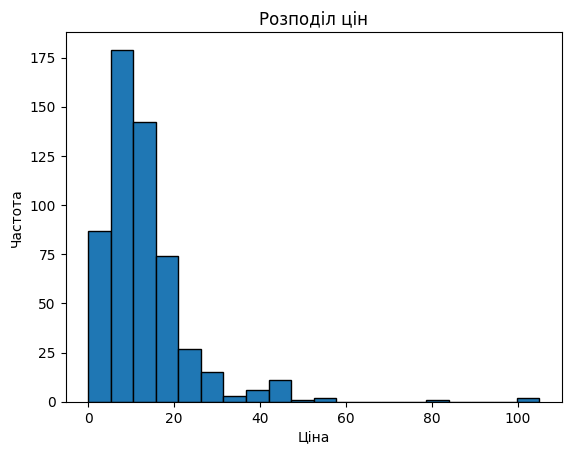

In [9]:
# Побудова гістограми розподілу цін
df['price'].plot(kind='hist', bins=20, edgecolor='black')

# Додаткові налаштування графіка
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')

# Відображення графіка
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


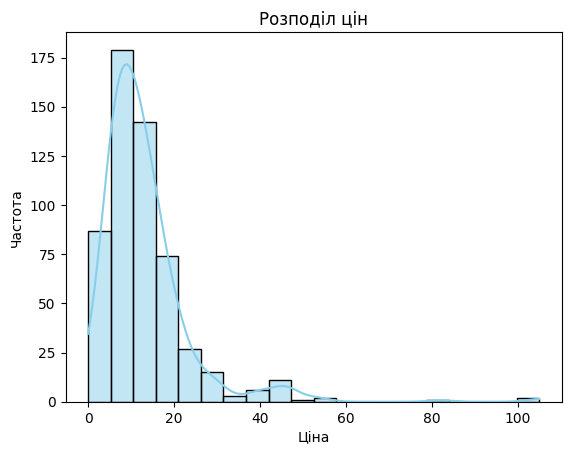

In [10]:
# Побудова гістограми розподілу цін
sns.histplot(df['price'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Додаткові налаштування графіка
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')

# Відображення графіка
plt.show()

In [11]:
# Максимальна ціна
max_price = df['price'].max()

# Мінімальна ціна
min_price = df['price'].min()

# Середня ціна
mean_price = df['price'].mean()

# Медіанна ціна
median_price = df['price'].median()

# Виведення результатів
print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [12]:
# Відповідь: Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()

# Виведення результату
print("ВІДПОВІДЬ - Який рейтинг у датасеті найвищий? -", max_rating)

ВІДПОВІДЬ - Який рейтинг у датасеті найвищий? - 4.9


In [13]:
# Знаходимо кількість книг з ьаксимальним рейтингом 
num_books_with_rating = df[df['user_rating'] == max_rating].shape[0]

# Виведення результату
print("ВІДПОВІДЬ: Скільки книг мають максимальний рейтинг?", num_books_with_rating)

ВІДПОВІДЬ: Скільки книг мають максимальний рейтинг? 52


In [14]:
# Знаходимо книгу з найбільшою кількістю відгуків
max_reviews_book = df[df['reviews'] == df['reviews'].max()]

# Виведення результату
print("ВІДПОВІДЬ: Яка книга має найбільше відгуків?")
print(max_reviews_book)

ВІДПОВІДЬ: Яка книга має найбільше відгуків?
                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


In [15]:
# Відфільтруємо DataFrame за умовою потрапляння книг до Топ-50 у 2015 році
top_50_2015 = df[(df['year'] == 2015) & (df['user_rating'] == max_rating)]

# Знаходимо найдорожчу книгу серед відфільтрованих книг
max_price_book = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]

# Виведення результату
print("ВІДПОВІДЬ: З тих книг, що потрапили до Топ-50 у 2015 році, найдорожча книга - ")
print(max_price_book)

ВІДПОВІДЬ: З тих книг, що потрапили до Топ-50 у 2015 році, найдорожча книга - 
                             name           author  user_rating  reviews  \
174  Humans of New York : Stories  Brandon Stanton          4.9     2812   

     price  year        genre  
174     17  2015  Non Fiction  


In [16]:
# Відфільтруємо DataFrame за умовою потрапляння книг до Топ-50 у 2010 році та жанру "Fiction"
fiction_top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]

# Знаходимо кількість книг, які відповідають цим критеріям
num_fiction_top_50_2010 = fiction_top_50_2010.shape[0]

# Виведення результату
print("ВІДПОВІДЬ: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? - ", num_fiction_top_50_2010)

ВІДПОВІДЬ: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? -  20


In [17]:
# Відфільтруємо DataFrame за умовою рейтингу та року з використанням методу isin()
books_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]

# Знаходимо кількість книг, які відповідають цій умові
num_books_4_9_2010_2011 = books_4_9_2010_2011.shape[0]

# Виведення результату
print("ВІДПОВІДЬ: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках - ", num_books_4_9_2010_2011)

ВІДПОВІДЬ: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках -  1


In [18]:
# Відфільтруємо DataFrame за умовою рейтингу та ціни
books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]

# Відсортуємо за зростанням ціни
sorted_books = books_2015_under_8.sort_values(by='price')

# Виведемо результат
print(sorted_books)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [19]:
# Остання книга у відсортованому списку
last_book = sorted_books.iloc[-1]

# Виведення результату
print("ВІДПОВІДЬ: Остання книга у відсортованому списку - ")
print(last_book)
# Відповідь: Яка книга остання у відсортованому списку?

ВІДПОВІДЬ: Остання книга у відсортованому списку - 
name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


In [20]:
# Відфільтруємо дані за жанром Fiction
fiction_data = df[df['genre'] == 'Fiction']

# Знайдемо максимальну та мінімальну ціну для жанру Fiction
max_price_fiction = fiction_data['price'].max()
min_price_fiction = fiction_data['price'].min()

# Виведемо результат
print("Максимальна ціна для жанру Fiction:", max_price_fiction)
print("Мінімальна ціна для жанру Fiction:", min_price_fiction)

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0


In [21]:
# Відфільтруємо дані за жанром Non Fiction
non_fiction_data = df[df['genre'] == 'Non Fiction']

# Знайдемо максимальну ціну для жанру Non Fiction
max_price_non_fiction = non_fiction_data['price'].max()

# Виведемо результат
print("ВІДПОВІДЬ: Максимальна ціна для жанру Non Fiction:", max_price_non_fiction)

ВІДПОВІДЬ: Максимальна ціна для жанру Non Fiction: 105


In [22]:
# Відфільтруємо дані за жанром Non Fiction
non_fiction_data = df[df['genre'] == 'Non Fiction']

# Знайдемо мінімальну ціну для жанру Non Fiction
min_price_non_fiction = non_fiction_data['price'].min()

# Виведемо результат
print("ВІДПОВІДЬ: Мінімальна ціна для жанру Non Fiction:", min_price_non_fiction)

ВІДПОВІДЬ: Мінімальна ціна для жанру Non Fiction: 0


In [23]:
# Групуємо дані за автором та обчислюємо кількість книг для кожного автора
author_book_count = df.groupby('author').agg(num_books=('name', 'count'))

# Виведення результату
print(author_book_count)

                            num_books
author                               
Abraham Verghese                    2
Adam Gasiewski                      1
Adam Mansbach                       1
Adir Levy                           1
Admiral William H. McRaven          1
...                               ...
Walter Isaacson                     3
William Davis                       2
William P. Young                    2
Wizards RPG Team                    3
Zhi Gang Sha                        2

[248 rows x 1 columns]


In [24]:
# Отримання розмірності таблиці
table_shape = author_book_count.shape

# Виведення результату
print("ВІДПОВІДЬ: Розмірність таблиці:", table_shape)

ВІДПОВІДЬ: Розмірність таблиці: (248, 1)


In [25]:
# Знайдемо ім'я автора з найбільшою кількістю книг
author_most_books = author_book_count['num_books'].idxmax()

# Виведемо результат
print("ВІДПОВІДЬ: Автор з найбільшою кількістю книг:", author_most_books)
# Визначення кількості книг цього автора
num_books_author_most = author_book_count.loc[author_most_books, 'num_books']

# Виведення результату
print("ВІДПОВІДЬ: Кількість книг цього автора" "-", num_books_author_most)

ВІДПОВІДЬ: Автор з найбільшою кількістю книг: Jeff Kinney
ВІДПОВІДЬ: Кількість книг цього автора- 12


In [26]:
# Групуємо дані за автором та обчислюємо середній рейтинг для кожного автора
author_mean_rating = df.groupby('author')['user_rating'].agg(mean_rating=('mean'))

# Виведення результату
print(author_mean_rating)

                            mean_rating
author                                 
Abraham Verghese               4.600000
Adam Gasiewski                 4.400000
Adam Mansbach                  4.800000
Adir Levy                      4.800000
Admiral William H. McRaven     4.700000
...                                 ...
Walter Isaacson                4.566667
William Davis                  4.400000
William P. Young               4.600000
Wizards RPG Team               4.800000
Zhi Gang Sha                   4.600000

[248 rows x 1 columns]


In [27]:
# Знайдемо ім'я автора з найменшим середнім рейтингом
author_min_mean_rating = author_mean_rating['mean_rating'].idxmin()

print("ВІДПОВІДЬ: Автор з найменшим середнім рейтингом:", author_min_mean_rating)
# Визначення середнього рейтингу для автора з найменшим середнім рейтингом
min_mean_rating = author_mean_rating.loc[author_min_mean_rating, 'mean_rating']

# Виведення результату
print("ВІДПОВІДЬ: Середній рейтинг цього автора""-", min_mean_rating)

ВІДПОВІДЬ: Автор з найменшим середнім рейтингом: Donna Tartt
ВІДПОВІДЬ: Середній рейтинг цього автора- 3.9


In [28]:
# З'єднання датафреймів по стовпцях
merged_df = pd.concat([author_book_count, author_mean_rating], axis=1)

# Виведення результату
print(merged_df)

                            num_books  mean_rating
author                                            
Abraham Verghese                    2     4.600000
Adam Gasiewski                      1     4.400000
Adam Mansbach                       1     4.800000
Adir Levy                           1     4.800000
Admiral William H. McRaven          1     4.700000
...                               ...          ...
Walter Isaacson                     3     4.566667
William Davis                       2     4.400000
William P. Young                    2     4.600000
Wizards RPG Team                    3     4.800000
Zhi Gang Sha                        2     4.600000

[248 rows x 2 columns]


In [29]:
# Відсортуємо датафрейм за зростанням кількості книг та рейтингу
sorted_df = merged_df.sort_values(by=['num_books', 'mean_rating'], ascending=[True, True])

# Виведення результату
print(sorted_df)

                                    num_books  mean_rating
author                                                    
Muriel Barbery                              1     4.000000
Chris Cleave                                1     4.100000
Ian K. Smith M.D.                           1     4.100000
Pierre Dukan                                1     4.100000
Elizabeth Strout                            1     4.200000
...                                       ...          ...
American Psychological Association         10     4.500000
Suzanne Collins                            11     4.663636
Gary Chapman                               11     4.736364
Rick Riordan                               11     4.772727
Jeff Kinney                                12     4.800000

[248 rows x 2 columns]


In [30]:
# Отримання імені першого автора у відсортованому списку
first_author = sorted_df.index[0]

# Виведення результату
print("ВІДПОВІДЬ: Перший автор у списку:", first_author)

ВІДПОВІДЬ: Перший автор у списку: Muriel Barbery


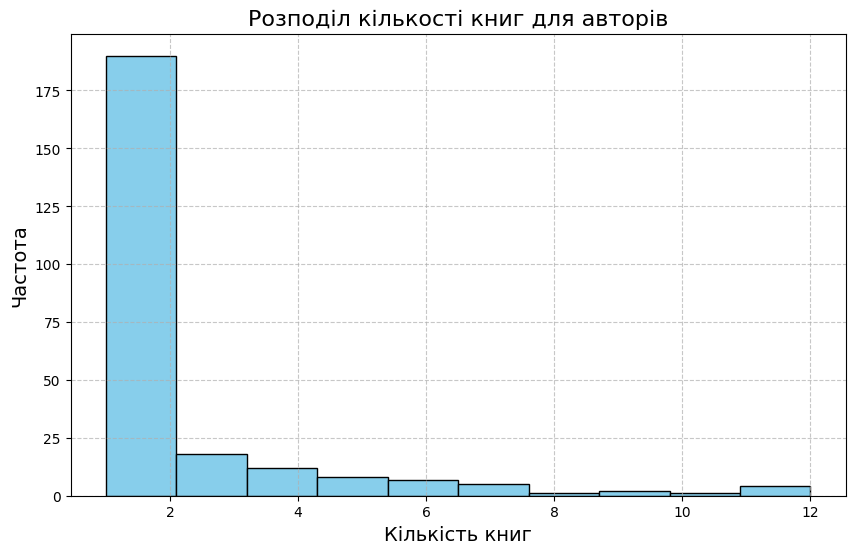

In [31]:
# Налаштування оформлення графіку
plt.figure(figsize=(10, 6))
plt.hist(author_book_count['num_books'], bins=10, color='skyblue', edgecolor='black')
plt.title('Розподіл кількості книг для авторів', fontsize=16)
plt.xlabel('Кількість книг', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

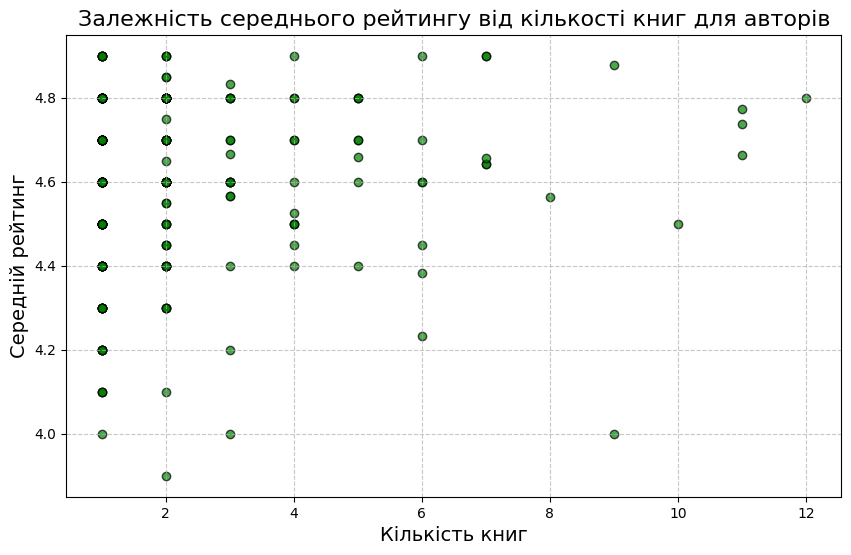

In [32]:
# Налаштування оформлення графіку
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['num_books'], merged_df['mean_rating'], color='green', alpha=0.7, edgecolors='black')
plt.title('Залежність середнього рейтингу від кількості книг для авторів', fontsize=16)
plt.xlabel('Кількість книг', fontsize=14)
plt.ylabel('Середній рейтинг', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

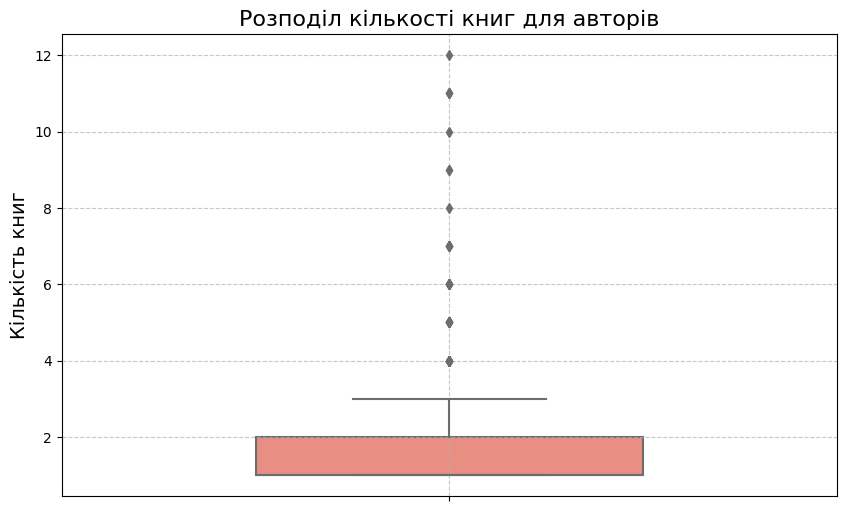

In [33]:
import seaborn as sns

# Налаштування оформлення графіку
plt.figure(figsize=(10, 6))
sns.boxplot(y=author_book_count['num_books'], color='salmon', width=0.5)
plt.title('Розподіл кількості книг для авторів', fontsize=16)
plt.ylabel('Кількість книг', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()